In [1]:
import analysis_functions as af
import pandas as pd
import numpy as np
import re
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [6]:
def prep_heat_map_dfs(metric_name):
    mean_heat_map = []
    for p_i in [2,8,16,32]:
        for s_i in [3,6,10,15,30,60]:
            temp_heat_map = pd.read_csv(
                "experiment_results/heat_map_data/Xy_N_6000_hm_"+metric_name+"_plot_data_"+
                str(p_i)+
                "_x_20_1000_x_30_1200_x_"+
                str(s_i)+".csv"
            )[["20","100","1000"]]
            new_col_names = ["p="+str(p_i)+"_s="+str(s_i)+"_pn="+ x for x in ["20","100","1000"]]
            temp_heat_map.columns = new_col_names
            mean_heat_map.append(temp_heat_map)
    mean_results = pd.concat(mean_heat_map, axis=1)
    mean_results['index'] = [30,150,300,600,1200]
    mean_results = mean_results.set_index(['index'], drop=True)
     
    return(mean_results)

In [7]:
mean = prep_heat_map_dfs(metric_name="mean")
std = prep_heat_map_dfs(metric_name="std")
adj_rt = prep_heat_map_dfs(metric_name="mean_adjusted_run_time")

In [22]:
mean

,p=2_s=3_pn=20,p=2_s=3_pn=100,p=2_s=3_pn=1000,p=2_s=6_pn=20,p=2_s=6_pn=100,p=2_s=6_pn=1000,p=2_s=10_pn=20,p=2_s=10_pn=100,p=2_s=10_pn=1000,p=2_s=15_pn=20,p=2_s=15_pn=100,p=2_s=15_pn=1000,p=2_s=30_pn=20,p=2_s=30_pn=100,p=2_s=30_pn=1000,p=2_s=60_pn=20,p=2_s=60_pn=100,p=2_s=60_pn=1000,p=8_s=3_pn=20,p=8_s=3_pn=100,p=8_s=3_pn=1000,p=8_s=6_pn=20,p=8_s=6_pn=100,p=8_s=6_pn=1000,p=8_s=10_pn=20,p=8_s=10_pn=100,p=8_s=10_pn=1000,p=8_s=15_pn=20,p=8_s=15_pn=100,p=8_s=15_pn=1000,p=8_s=30_pn=20,p=8_s=30_pn=100,p=8_s=30_pn=1000,p=8_s=60_pn=20,p=8_s=60_pn=100,p=8_s=60_pn=1000,p=16_s=3_pn=20,p=16_s=3_pn=100,p=16_s=3_pn=1000,p=16_s=6_pn=20,p=16_s=6_pn=100,p=16_s=6_pn=1000,p=16_s=10_pn=20,p=16_s=10_pn=100,p=16_s=10_pn=1000,p=16_s=15_pn=20,p=16_s=15_pn=100,p=16_s=15_pn=1000,p=16_s=30_pn=20,p=16_s=30_pn=100,p=16_s=30_pn=1000,p=16_s=60_pn=20,p=16_s=60_pn=100,p=16_s=60_pn=1000,p=32_s=3_pn=20,p=32_s=3_pn=100,p=32_s=3_pn=1000,p=32_s=6_pn=20,p=32_s=6_pn=100,p=32_s=6_pn=1000,p=32_s=10_pn=20,p=32_s=10_pn=100,p=32_s=10_pn=1000,p=32_s=15_pn=20,p=32_s=15_pn=100,p=32_s=15_pn=1000,p=32_s=30_pn=20,p=32_s=30_pn=100,p=32_s=30_pn=1000,p=32_s=60_pn=20,p=32_s=60_pn=100,p=32_s=60_pn=1000
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30,0.007414,0.010142,0.007717,0.025733,0.030627,0.025541,0.047555,0.053237,0.060527,0.042052,0.051463,0.059207,0.029644,0.032431,0.036956,0.042003,0.038473,0.039437,0.007140,0.005096,0.007832,0.016108,0.016751,0.018675,0.018949,0.016088,0.028517,0.018060,0.012935,0.012334,0.004185,0.000331,0.015338,0.032861,0.045701,0.051387,0.013937,0.001375,0.004202,0.014009,0.000624,0.006843,0.003892,0.000751,0.006050,-0.011891,-0.004838,0.009118,0.002577,0.022336,0.018567,0.028355,0.032863,0.036658,0.000604,-0.003176,-0.007164,0.015207,0.000649,-0.012342,-0.009704,-0.008491,-0.013970,-0.005968,-0.020928,NaN,0.020075,0.048730,NaN,0.050029,0.058461,0.066793
150,-0.002700,0.000549,0.000998,0.005486,0.001359,-0.003750,0.006927,0.008648,0.009627,0.017158,0.018996,0.018546,0.018587,0.014731,0.025969,0.056590,0.047501,0.054055,0.001741,0.001862,0.003053,0.005680,0.009856,0.006879,0.016803,0.013733,0.016531,0.021483,0.017368,0.019828,0.020763,0.021790,0.019805,0.052242,0.047671,0.042180,-0.003766,-0.002758,-0.004997,0.011431,0.005821,0.004496,0.023491,0.002349,0.007267,0.016140,0.007725,0.003308,0.022975,0.023654,0.020584,0.058075,0.052640,0.042354,0.016279,-0.011619,-0.002945,0.002846,-0.008087,-0.000561,-0.000400,-0.002341,0.001270,0.004794,0.009826,-0.002250,0.005062,0.005038,0.014135,0.058764,0.048015,0.050428
300,0.001921,0.002737,0.000518,0.004507,0.001452,0.001078,0.006734,0.005526,0.004786,0.008310,0.010296,0.010516,0.020700,0.026016,0.029208,0.044730,0.050636,0.044314,0.004504,-0.002611,0.002294,0.008462,0.005221,0.003933,0.007662,0.010325,0.008154,0.015335,0.009854,0.010145,0.013447,0.014983,0.015185,0.052372,0.048499,0.042824,-0.004967,0.002982,0.003049,0.010770,0.012180,0.008589,0.014932,0.006221,0.010273,0.004125,0.011471,0.008185,0.035802,0.028279,0.021080,0.063175,0.051980,0.046204,-0.006990,-0.001892,-0.003960,-0.003644,0.004784,0.006409,0.006377,-0.003880,0.011912,0.010077,0.005747,0.013509,0.011801,0.018256,0.029539,0.061344,0.048986,0.041607
600,-0.003267,0.001324,0.000024,0.000909,0.001916,0.000731,0.001167,-0.000141,-0.000512,0.002500,0.001309,0.000971,0.006289,0.010762,0.008750,0.028383,0.034698,0.030048,0.004817,0.002077,0.000983,0.005334,0.004072,-0.003867,0.000925,0.005650,0.002088,0.012718,0.009123,0.008045,0.007625,0.010135,0.012579,0.038335,0.031078,0.026039,0.006255,0.000587,-0.000359,0.004060,-0.003571,0.003854,0.009988,0.006416,0.004677,-0.000510,0.006696,0.007601,0.020993,0.018368,0.015454,0.050254,0.046094,0.041140,-0.010253,-0.010944,-0.003014,-0.010295,0.014089,-0.002463,0.010925,0.004456,0.005531,0.027261,0.009356,0.007906,0.007180,0.015891,0.021465,0.041557,0.059466,0.047542
1200,-0.001714,0.000538,0.000165,-0.001050,-0.003001,0.000187,-0.001299,0.001198,0.000614,-0.000002,0.001088,0.000040,0

In [23]:
std

,p=2_s=3_pn=20,p=2_s=3_pn=100,p=2_s=3_pn=1000,p=2_s=6_pn=20,p=2_s=6_pn=100,p=2_s=6_pn=1000,p=2_s=10_pn=20,p=2_s=10_pn=100,p=2_s=10_pn=1000,p=2_s=15_pn=20,p=2_s=15_pn=100,p=2_s=15_pn=1000,p=2_s=30_pn=20,p=2_s=30_pn=100,p=2_s=30_pn=1000,p=2_s=60_pn=20,p=2_s=60_pn=100,p=2_s=60_pn=1000,p=8_s=3_pn=20,p=8_s=3_pn=100,p=8_s=3_pn=1000,p=8_s=6_pn=20,p=8_s=6_pn=100,p=8_s=6_pn=1000,p=8_s=10_pn=20,p=8_s=10_pn=100,p=8_s=10_pn=1000,p=8_s=15_pn=20,p=8_s=15_pn=100,p=8_s=15_pn=1000,p=8_s=30_pn=20,p=8_s=30_pn=100,p=8_s=30_pn=1000,p=8_s=60_pn=20,p=8_s=60_pn=100,p=8_s=60_pn=1000,p=16_s=3_pn=20,p=16_s=3_pn=100,p=16_s=3_pn=1000,p=16_s=6_pn=20,p=16_s=6_pn=100,p=16_s=6_pn=1000,p=16_s=10_pn=20,p=16_s=10_pn=100,p=16_s=10_pn=1000,p=16_s=15_pn=20,p=16_s=15_pn=100,p=16_s=15_pn=1000,p=16_s=30_pn=20,p=16_s=30_pn=100,p=16_s=30_pn=1000,p=16_s=60_pn=20,p=16_s=60_pn=100,p=16_s=60_pn=1000,p=32_s=3_pn=20,p=32_s=3_pn=100,p=32_s=3_pn=1000,p=32_s=6_pn=20,p=32_s=6_pn=100,p=32_s=6_pn=1000,p=32_s=10_pn=20,p=32_s=10_pn=100,p=32_s=10_pn=1000,p=32_s=15_pn=20,p=32_s=15_pn=100,p=32_s=15_pn=1000,p=32_s=30_pn=20,p=32_s=30_pn=100,p=32_s=30_pn=1000,p=32_s=60_pn=20,p=32_s=60_pn=100,p=32_s=60_pn=1000
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30,0.002403,0.002357,0.002123,0.003224,0.003264,0.005063,0.002299,0.002242,0.001994,0.003551,0.002767,0.002121,0.006030,0.003725,0.002970,0.014248,0.012048,0.015551,0.006210,0.003246,0.001668,0.004352,0.003566,0.002981,0.005462,0.004599,0.003041,0.003860,0.003436,0.004584,0.008772,0.006276,0.005073,0.010984,0.011212,0.010591,0.005529,0.005470,0.002699,0.003098,0.003737,0.002450,0.005748,0.004601,0.003366,0.011154,0.006200,0.002191,0.006934,0.005250,0.004355,0.007022,0.005200,0.003492,0.004099,0.005888,0.004479,0.006145,0.003056,0.003370,0.012699,0.004390,0.000000,0.011019,0.009682,NaN,0.010974,0.005042,NaN,0.010094,0.006517,0.004085
150,0.003003,0.002131,0.001110,0.001467,0.002168,0.002703,0.003510,0.002111,0.002175,0.002187,0.003013,0.003713,0.007795,0.008830,0.005713,0.015463,0.018069,0.020657,0.005130,0.002911,0.003296,0.003380,0.004580,0.001393,0.001820,0.002607,0.002916,0.003788,0.004090,0.001667,0.005079,0.005420,0.002364,0.009856,0.009288,0.006055,0.004084,0.005405,0.002163,0.004176,0.001786,0.003626,0.003649,0.003537,0.003435,0.005411,0.003517,0.003480,0.007396,0.005266,0.003719,0.006294,0.004641,0.004287,0.006262,0.004482,0.003466,0.006506,0.005301,0.003495,0.008252,0.007650,0.002839,0.007770,0.006707,0.004681,0.014268,0.008982,0.007496,0.012395,0.006650,0.004781
300,0.002520,0.001335,0.001161,0.002211,0.001690,0.000888,0.001747,0.001179,0.001220,0.002289,0.002444,0.001483,0.003776,0.002692,0.005217,0.018245,0.026691,0.023576,0.004268,0.004414,0.002469,0.003071,0.002008,0.001541,0.002822,0.002899,0.002038,0.004147,0.003127,0.001906,0.003684,0.003074,0.001275,0.008062,0.004373,0.006788,0.004585,0.002592,0.002106,0.004310,0.002937,0.002060,0.005379,0.004361,0.001255,0.008071,0.005247,0.002415,0.010194,0.004712,0.005417,0.010493,0.010441,0.006884,0.008023,0.004644,0.003991,0.015066,0.006038,0.003836,0.006474,0.006437,0.004486,0.005132,0.006982,0.003709,0.010016,0.008405,0.005779,0.006145,0.007424,0.006575
600,0.002504,0.001128,0.000773,0.001413,0.001918,0.000747,0.001429,0.001208,0.000459,0.001324,0.000906,0.000925,0.006843,0.004317,0.004280,0.014504,0.020400,0.018270,0.003273,0.003409,0.001702,0.002668,0.002082,0.002042,0.002330,0.001524,0.001718,0.002366,0.001710,0.001762,0.006330,0.001437,0.002561,0.006265,0.005702,0.003309,0.003335,0.002796,0.002717,0.002919,0.003627,0.002641,0.005079,0.004526,0.002046,0.004924,0.003534,0.003248,0.006725,0.006339,0.003496,0.005877,0.003928,0.006342,0.006454,0.003742,0.003910,0.006750,0.004393,0.003435,0.005857,0.006617,0.004159,0.008593,0.009072,0.004195,0.011914,0.006674,0.006670,0.009856,0.007291,0.005414
1200,0.002772,0.001733,0.000564,0.002461,0.001464,0.000992,0.001182,0.001310,0.000510,0.001922,0.001355,0.001047,0.003740,0.001257,0.001570,0.009347,0.013560,0.

In [24]:
adj_rt

,p=2_s=3_pn=20,p=2_s=3_pn=100,p=2_s=3_pn=1000,p=2_s=6_pn=20,p=2_s=6_pn=100,p=2_s=6_pn=1000,p=2_s=10_pn=20,p=2_s=10_pn=100,p=2_s=10_pn=1000,p=2_s=15_pn=20,p=2_s=15_pn=100,p=2_s=15_pn=1000,p=2_s=30_pn=20,p=2_s=30_pn=100,p=2_s=30_pn=1000,p=2_s=60_pn=20,p=2_s=60_pn=100,p=2_s=60_pn=1000,p=8_s=3_pn=20,p=8_s=3_pn=100,p=8_s=3_pn=1000,p=8_s=6_pn=20,p=8_s=6_pn=100,p=8_s=6_pn=1000,p=8_s=10_pn=20,p=8_s=10_pn=100,p=8_s=10_pn=1000,p=8_s=15_pn=20,p=8_s=15_pn=100,p=8_s=15_pn=1000,p=8_s=30_pn=20,p=8_s=30_pn=100,p=8_s=30_pn=1000,p=8_s=60_pn=20,p=8_s=60_pn=100,p=8_s=60_pn=1000,p=16_s=3_pn=20,p=16_s=3_pn=100,p=16_s=3_pn=1000,p=16_s=6_pn=20,p=16_s=6_pn=100,p=16_s=6_pn=1000,p=16_s=10_pn=20,p=16_s=10_pn=100,p=16_s=10_pn=1000,p=16_s=15_pn=20,p=16_s=15_pn=100,p=16_s=15_pn=1000,p=16_s=30_pn=20,p=16_s=30_pn=100,p=16_s=30_pn=1000,p=16_s=60_pn=20,p=16_s=60_pn=100,p=16_s=60_pn=1000,p=32_s=3_pn=20,p=32_s=3_pn=100,p=32_s=3_pn=1000,p=32_s=6_pn=20,p=32_s=6_pn=100,p=32_s=6_pn=1000,p=32_s=10_pn=20,p=32_s=10_pn=100,p=32_s=10_pn=1000,p=32_s=15_pn=20,p=32_s=15_pn=100,p=32_s=15_pn=1000,p=32_s=30_pn=20,p=32_s=30_pn=100,p=32_s=30_pn=1000,p=32_s=60_pn=20,p=32_s=60_pn=100,p=32_s=60_pn=1000
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30,24.577923,121.334334,1302.234133,24.069323,120.170260,1317.182406,24.082447,120.622267,1328.823037,24.031839,119.708683,1327.558723,24.063377,117.104855,1275.635897,17.276735,74.726617,787.169382,25.069712,123.573476,1972.065158,24.336370,122.556049,1370.879328,24.645751,124.732337,1977.707612,24.323302,121.224190,1348.677376,24.251515,118.582329,1301.733513,16.159424,76.909350,797.041600,25.378513,125.734299,1389.830958,24.689460,124.766733,1377.821522,24.888296,123.568934,1373.524886,24.704610,123.425018,1361.631544,24.563007,120.527820,1304.180208,16.478134,76.919611,801.246103,26.015217,130.507211,1448.420285,25.938177,129.083360,1437.455412,25.720615,127.562240,1437.101072,25.423571,128.140919,NaN,25.259787,124.597024,NaN,16.740402,78.614717,819.093373
150,19.327003,95.223887,1052.043201,19.023811,94.209949,1060.598949,18.707398,92.700436,1060.723738,18.624600,92.445339,1064.764816,18.607426,90.974066,1030.466556,10.391501,48.028470,525.961290,19.603228,96.891512,1103.944110,19.395096,96.137430,1111.203070,19.002180,94.701312,1104.542189,18.883887,94.164067,1096.712690,18.760956,92.454133,1053.355075,10.518026,48.769738,540.889348,20.075171,99.380800,1137.920820,19.830618,98.695838,1140.194617,19.426680,97.139179,1130.379364,19.289992,96.404061,1119.265724,19.223620,94.736357,1076.866041,10.690812,49.633883,550.432081,20.958090,104.274403,1198.451446,20.672656,103.430348,1193.790158,20.392843,101.983170,1181.894568,20.332942,101.658647,1173.442421,19.876165,98.323568,1111.948820,11.002806,51.574243,565.964791
300,18.668807,91.797047,1017.156085,18.398213,90.634230,1024.097699,18.166909,89.505566,1023.847595,18.192642,89.508508,1033.550119,17.882735,87.209427,998.413272,9.694846,44.709137,488.962421,18.906307,93.688792,1071.321991,18.746666,92.927566,1079.007242,18.438177,91.676808,1071.178371,18.508346,91.407249,1068.449838,18.107132,88.729502,1021.857229,9.826656,45.589201,508.592121,19.332368,96.724011,1108.604106,19.118143,95.171041,1112.036648,18.901151,94.087862,1098.695339,18.931434,93.810278,1094.680768,18.524075,90.987249,1043.184188,9.997163,46.551942,517.669925,20.087098,100.296199,1159.589453,20.142086,100.557511,1171.533748,19.970440,99.167429,1161.657609,19.582884,97.854131,1145.637583,19.254994,95.219749,1087.844614,10.376196,48.068522,534.772802
600,18.272002,90.648036,999.818152,17.921875,88.980302,1000.404400,17.775904,88.039767,1013.142713,17.717523,88.089847,1021.336681,17.645357,86.478743,996.811527,9.328061,43.158608,472.302949,18.484983,92.600338,1056.374777,18.139094,91.011447,1052.771795,18.029572,90.163859,1057.171030,17.966476,89.949203,1050.764808,17.858582,87.971407,1012.115249,9.439396,43.828588,487.569623,18.953740,95.058054,1091.916172,18.646415,93.237252,1089.273828,18

In [29]:
mean/std

,p=2_s=3_pn=20,p=2_s=3_pn=100,p=2_s=3_pn=1000,p=2_s=6_pn=20,p=2_s=6_pn=100,p=2_s=6_pn=1000,p=2_s=10_pn=20,p=2_s=10_pn=100,p=2_s=10_pn=1000,p=2_s=15_pn=20,p=2_s=15_pn=100,p=2_s=15_pn=1000,p=2_s=30_pn=20,p=2_s=30_pn=100,p=2_s=30_pn=1000,p=2_s=60_pn=20,p=2_s=60_pn=100,p=2_s=60_pn=1000,p=8_s=3_pn=20,p=8_s=3_pn=100,p=8_s=3_pn=1000,p=8_s=6_pn=20,p=8_s=6_pn=100,p=8_s=6_pn=1000,p=8_s=10_pn=20,p=8_s=10_pn=100,p=8_s=10_pn=1000,p=8_s=15_pn=20,p=8_s=15_pn=100,p=8_s=15_pn=1000,p=8_s=30_pn=20,p=8_s=30_pn=100,p=8_s=30_pn=1000,p=8_s=60_pn=20,p=8_s=60_pn=100,p=8_s=60_pn=1000,p=16_s=3_pn=20,p=16_s=3_pn=100,p=16_s=3_pn=1000,p=16_s=6_pn=20,p=16_s=6_pn=100,p=16_s=6_pn=1000,p=16_s=10_pn=20,p=16_s=10_pn=100,p=16_s=10_pn=1000,p=16_s=15_pn=20,p=16_s=15_pn=100,p=16_s=15_pn=1000,p=16_s=30_pn=20,p=16_s=30_pn=100,p=16_s=30_pn=1000,p=16_s=60_pn=20,p=16_s=60_pn=100,p=16_s=60_pn=1000,p=32_s=3_pn=20,p=32_s=3_pn=100,p=32_s=3_pn=1000,p=32_s=6_pn=20,p=32_s=6_pn=100,p=32_s=6_pn=1000,p=32_s=10_pn=20,p=32_s=10_pn=100,p=32_s=10_pn=1000,p=32_s=15_pn=20,p=32_s=15_pn=100,p=32_s=15_pn=1000,p=32_s=30_pn=20,p=32_s=30_pn=100,p=32_s=30_pn=1000,p=32_s=60_pn=20,p=32_s=60_pn=100,p=32_s=60_pn=1000
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30,3.085709,4.302781,3.635328,7.981896,9.383001,5.044472,20.684847,23.746001,30.354088,11.843491,18.600385,27.916558,4.915710,8.706879,12.443545,2.948096,3.193231,2.535945,1.149850,1.570031,4.695325,3.701102,4.697335,6.265266,3.469101,3.497756,9.376142,4.678546,3.764554,2.690570,0.477106,0.052819,3.023316,2.991712,4.075947,4.851762,2.520484,0.251395,1.556760,4.522634,0.166871,2.792880,0.677103,0.163292,1.797572,-1.066050,-0.780341,4.162035,0.371723,4.254927,4.263667,4.038093,6.320355,10.496770,0.147417,-0.539331,-1.599522,2.474736,0.212495,-3.661841,-0.764192,-1.934288,-inf,-0.541606,-2.161474,NaN,1.829295,9.663849,NaN,4.956527,8.970382,16.349894
150,-0.899147,0.257762,0.898526,3.739424,0.627106,-1.387600,1.973569,4.095920,4.427409,7.846604,6.305481,4.994564,2.384459,1.668322,4.545502,3.659808,2.628893,2.616741,0.339442,0.639458,0.926351,1.680219,2.151689,4.937450,9.234284,5.267197,5.668800,5.671950,4.246313,11.894226,4.087715,4.020171,8.378396,5.300433,5.132334,6.966396,-0.922188,-0.510188,-2.310829,2.737169,3.259488,1.239769,6.437082,0.664069,2.115480,2.983155,2.196561,0.950432,3.106445,4.491607,5.534371,9.227027,11.342505,9.879101,2.599588,-2.592547,-0.849520,0.437480,-1.525758,-0.160618,-0.048453,-0.305987,0.447337,0.616950,1.465006,-0.480735,0.354808,0.560960,1.885675,4.741101,7.220817,10.547055
300,0.762364,2.050941,0.446080,2.038944,0.858872,1.214488,3.855391,4.687233,3.921341,3.630864,4.212730,7.091240,5.482651,9.663704,5.598452,2.451561,1.897127,1.879629,1.055192,-0.591445,0.929176,2.755521,2.600402,2.551298,2.715427,3.562156,4.000901,3.697610,3.151110,5.321433,3.650550,4.874637,11.914644,6.496260,11.089933,6.308860,-1.083374,1.150577,1.447647,2.498587,4.146564,4.168891,2.776038,1.426430,8.188450,0.511066,2.186149,3.389075,3.512181,6.001559,3.891716,6.020658,4.978638,6.711816,-0.871237,-0.407509,-0.992278,-0.241858,0.792325,1.670632,0.985126,-0.602721,2.655165,1.963319,0.823149,3.642619,1.178128,2.171937,5.111170,9.983469,6.598631,6.328180
600,-1.304931,1.172934,0.030487,0.643353,0.998956,0.978819,0.816524,-0.116642,-1.114575,1.887862,1.445185,1.049260,0.919035,2.492700,2.044387,1.956845,1.700833,1.644611,1.471690,0.609297,0.577468,1.999436,1.955904,-1.893305,0.397068,3.708298,1.214840,5.376236,5.335099,4.564895,1.204531,7.053155,4.911189,6.119183,5.449892,7.868758,1.875338,0.210014,-0.132248,1.390700,-0.984457,1.459130,1.966412,1.417545,2.286109,-0.103532,1.895134,2.340619,3.121800,2.897782,4.420627,8.551035,11.734827,6.487212,-1.588784,-2.924521,-0.770797,-1.525199,3.207040,-0.717087,1.865390,0.673412,1.329717,3.172432,1.031242,1.884885,0.602630,2.380964,3.217850,4.216397,8.155517,8.780819
1200,-0.618198,0.310326,0.292957,-0.426754,-2.050021,0.189032,-1.098874,0.914554,1.202404,-0.000852,0.803061,

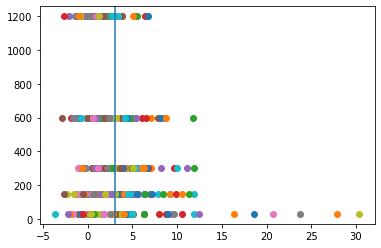

In [20]:
cols = mean.columns
for c in cols:
    plt.plot((mean/std)[c] , mean.index.values, 'o')
plt.axvline(x=3)


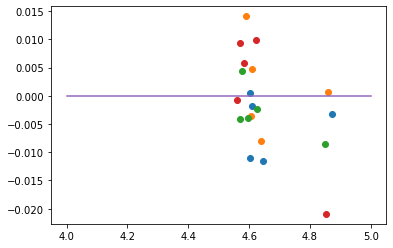

In [13]:
cols = list(mean.columns)
cols = [
    'p=32_s=3_pn=100',
    'p=32_s=6_pn=100',
    'p=32_s=10_pn=100',
    'p=32_s=15_pn=100',
    #'p=32_s=30_pn=100',
    #'p=32_s=60_pn=100',
]
for c in range(len(cols)):
    plt.plot(np.log(adj_rt[cols[c]]), mean[cols[c]], 'o')
plt.plot([4,5], [0, 0])

In [72]:
mean

,p=2_s=3_pn=20,p=2_s=3_pn=100,p=2_s=3_pn=1000,p=2_s=6_pn=20,p=2_s=6_pn=100,p=2_s=6_pn=1000,p=2_s=10_pn=20,p=2_s=10_pn=100,p=2_s=10_pn=1000,p=2_s=15_pn=20,...,p=32_s=10_pn=1000,p=32_s=15_pn=20,p=32_s=15_pn=100,p=32_s=15_pn=1000,p=32_s=30_pn=20,p=32_s=30_pn=100,p=32_s=30_pn=1000,p=32_s=60_pn=20,p=32_s=60_pn=100,p=32_s=60_pn=1000
index,,,,,,,,,,,,,,,,,,,,,
30,0.006884,0.010266,NaN,0.025634,0.030062,NaN,0.047515,0.054043,NaN,0.043476,...,NaN,-0.006823,-0.021148,NaN,0.021018,0.048264,NaN,0.050660,0.059268,NaN
150,-0.002115,0.000829,NaN,0.005902,0.002078,NaN,0.007197,0.007737,NaN,0.016352,...,NaN,0.003965,0.009898,NaN,0.005458,0.005206,NaN,0.058629,0.048165,NaN
300,0.002138,0.002883,NaN,0.004253,0.001344,NaN,0.007269,0.005492,NaN,0.008695,...,NaN,0.009980,0.005577,NaN,0.011533,0.018227,NaN,0.061238,0.048584,NaN
600,-0.003710,0.001343,NaN,0.001105,0.001407,NaN,0.001459,0.000086,NaN,0.003105,...,NaN,0.026169,0.009323,NaN,0.006957,0.017549,NaN,0.041545,0.059933,NaN
1200,-0.001570,0.000388,NaN,-0.000573,-0.002753,NaN,-0.001429,0.001920,NaN,0.000559,...,NaN,-0.014766,-0.000890,NaN,0.008692,0.000302,NaN,0.021215,0.025289,NaN


In [104]:
std

,p=2_s=3_pn=20,p=2_s=3_pn=100,p=2_s=3_pn=1000,p=2_s=6_pn=20,p=2_s=6_pn=100,p=2_s=6_pn=1000,p=2_s=10_pn=20,p=2_s=10_pn=100,p=2_s=10_pn=1000,p=2_s=15_pn=20,...,p=32_s=10_pn=1000,p=32_s=15_pn=20,p=32_s=15_pn=100,p=32_s=15_pn=1000,p=32_s=30_pn=20,p=32_s=30_pn=100,p=32_s=30_pn=1000,p=32_s=60_pn=20,p=32_s=60_pn=100,p=32_s=60_pn=1000
index,,,,,,,,,,,,,,,,,,,,,
30,0.002137,0.002214,NaN,0.002956,0.003237,NaN,0.002336,0.002170,NaN,0.003428,...,NaN,0.010895,0.009589,NaN,0.011244,0.005026,NaN,0.0,0.0,0.0
150,0.002876,0.002019,NaN,0.001723,0.001956,NaN,0.003682,0.002122,NaN,0.002025,...,NaN,0.007911,0.006771,NaN,0.014497,0.008827,NaN,0.0,0.0,0.0
300,0.002347,0.001140,NaN,0.002149,0.001684,NaN,0.001920,0.001264,NaN,0.002260,...,NaN,0.005079,0.006819,NaN,0.009991,0.008787,NaN,0.0,0.0,0.0
600,0.002531,0.001016,NaN,0.001494,0.001897,NaN,0.001335,0.001254,NaN,0.001292,...,NaN,0.008750,0.009573,NaN,0.012136,0.006840,NaN,0.0,0.0,0.0
1200,0.002948,0.001503,NaN,0.002267,0.001578,NaN,0.001287,0.001241,NaN,0.001972,...,NaN,0.005555,0.007812,NaN,0.009361,0.007318,NaN,0.0,0.0,0.0


In [105]:
adj_rt

,p=2_s=3_pn=20,p=2_s=3_pn=100,p=2_s=3_pn=1000,p=2_s=6_pn=20,p=2_s=6_pn=100,p=2_s=6_pn=1000,p=2_s=10_pn=20,p=2_s=10_pn=100,p=2_s=10_pn=1000,p=2_s=15_pn=20,...,p=32_s=10_pn=1000,p=32_s=15_pn=20,p=32_s=15_pn=100,p=32_s=15_pn=1000,p=32_s=30_pn=20,p=32_s=30_pn=100,p=32_s=30_pn=1000,p=32_s=60_pn=20,p=32_s=60_pn=100,p=32_s=60_pn=1000
index,,,,,,,,,,,,,,,,,,,,,
30,24.577923,121.334334,NaN,24.069323,120.170260,NaN,24.082447,120.622267,NaN,24.031839,...,NaN,25.423571,128.140919,NaN,25.259787,124.597024,NaN,16.740402,78.614717,NaN
150,19.327003,95.223887,NaN,19.023811,94.209949,NaN,18.707398,92.700436,NaN,18.624600,...,NaN,20.332942,101.658647,NaN,19.876165,98.323568,NaN,11.002806,51.574243,NaN
300,18.668807,91.797047,NaN,18.398213,90.634230,NaN,18.166909,89.505566,NaN,18.192642,...,NaN,19.582884,97.854131,NaN,19.254994,95.219749,NaN,10.376196,48.068522,NaN
600,18.272002,90.648036,NaN,17.921875,88.980302,NaN,17.775904,88.039767,NaN,17.717523,...,NaN,19.175678,96.504490,NaN,18.867686,93.762514,NaN,10.023107,46.591422,NaN
1200,18.236654,90.851117,NaN,17.861439,90.090762,NaN,17.519508,87.373624,NaN,17.306263,...,NaN,18.998201,95.536647,NaN,18.714747,93.438372,NaN,9.796941,45.831782,NaN


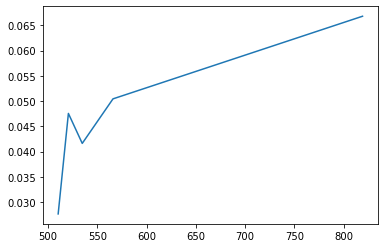

In [15]:
plt.plot((adj_rt["p=32_s=60_pn=1000"]), mean["p=32_s=60_pn=1000"])

In [17]:
mean["p=2_s=60_pn=1000"]

index
30      0.039437
150     0.054055
300     0.044314
600     0.030048
1200    0.018709
Name: p=2_s=60_pn=1000, dtype: float64

In [18]:
mean["p=2_s=60_pn=100"]

index
30      0.038473
150     0.047501
300     0.050636
600     0.034698
1200    0.030981
Name: p=2_s=60_pn=100, dtype: float64